<a href="https://colab.research.google.com/github/Saron773/Winter-2022/blob/main/ML2_MiniProject_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Description

The dataset represents 10 years (1999-2008) of clinical care at 130 US hospitals and integrated delivery networks. It includes over 50 features representing patient and hospital outcomes. Information was extracted from the database for encounters that satisfied the following criteria.
<br>**1.**It is an inpatient encounter (a hospital admission).
<br>**2.**It is a diabetic encounter, that is, one during which any kind of diabetes was entered to the system as a diagnosis.
The length of stay was at least 1 day and at most 14 days.
<br>**3.**Laboratory tests were performed during the encounter.
<br>**4.**Medications were administered during the encounter.
<br>**5.**The data contains such attributes as patient number, race, gender, age, admission type, time in hospital, medical specialty of admitting physician, number of lab test performed, HbA1c test result, diagnosis, number of medication, diabetic medications, number of outpatient, inpatient, and emergency visits in the year before the hospitalization, etc.


# Import Libaries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Loading Data

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/yongguang-Zhang/ML_DATA/main/dataset_diabetes/diabetic_data.csv')

# EDA

In [3]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [4]:
df['weight'].value_counts()

?            98569
[75-100)      1336
[50-75)        897
[100-125)      625
[125-150)      145
[25-50)         97
[0-25)          48
[150-175)       35
[175-200)       11
>200             3
Name: weight, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [6]:
# There is no null value in this dataset.
# But there are some '?' values which are Null values.

## Check the age distribution of this data

In [7]:
# Extract 'Age' column to analyze age distribution of this data
age_dist = df['age'].value_counts()
age_dist.sort_values(inplace=True)
age_dist

[0-10)        161
[10-20)       691
[20-30)      1657
[90-100)     2793
[30-40)      3775
[40-50)      9685
[80-90)     17197
[50-60)     17256
[60-70)     22483
[70-80)     26068
Name: age, dtype: int64

In [8]:
# Draw a pie chart of Age distribution 
fig = px.bar(age_dist,x=age_dist.index,y=age_dist.values,color=age_dist.index,hover_name=age_dist.index,title='Age Distribution',
        labels = {'x':'Age Range',
              'y':'Numbers of people'})
fig.show()

## Check the race distribution of this data

In [9]:
race_dist = df['race'].value_counts()
race_dist

Caucasian          76099
AfricanAmerican    19210
?                   2273
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64

In [10]:
# There are some '?' values which are Nan values found.
# It seems we could add it into 'other'
race_dist['Other'] = race_dist['Other'] + race_dist['?']
race_dist.drop('?',axis=0,inplace=True)
# We also need apply it to original dataframe 

In [11]:
df['race'].replace('?','Other',inplace=True)

In [12]:
race_dist

Caucasian          76099
AfricanAmerican    19210
Hispanic            2037
Other               3779
Asian                641
Name: race, dtype: int64

In [13]:
fig = px.pie(race_dist,names=race_dist.index,values=race_dist.values,title='Race Distribution')
fig.show()

In [14]:
# Caucasians are the majority race.

## Check out 'Gender' Column

In [15]:
# see if there are any values other than 'Male' and 'Female'
df['gender'].unique()

array(['Female', 'Male', 'Unknown/Invalid'], dtype=object)

In [16]:
df['gender'].value_counts()

Female             54708
Male               47055
Unknown/Invalid        3
Name: gender, dtype: int64

In [17]:
# 'Unknown/Invalid' is very small part.So we could drop them. 
df = df[df['gender']!='Unknown/Invalid']
gender_df = df
gender_df.head()


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [18]:
# Double check if we drop 'Unknown/Invalid'
gender_df['gender'].value_counts()

Female    54708
Male      47055
Name: gender, dtype: int64

#Value Count for columns

In [60]:
df['readmitted'].value_counts()

NO     54861
>30    35545
<30    11357
Name: readmitted, dtype: int64

In [61]:
df['diabetesMed'].value_counts()

Yes    78361
No     23402
Name: diabetesMed, dtype: int64

Text(0, 0.5, 'Numbers of People')

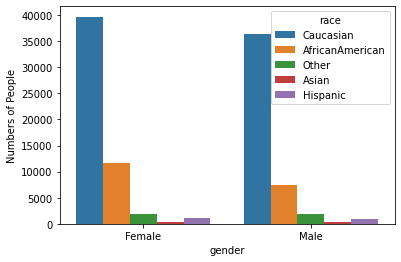

In [19]:
sns.countplot(x=gender_df['gender'],data=gender_df,hue='race')
plt.ylabel('Numbers of People')

## Check out weight Column

In [20]:
df['weight'].value_counts(normalize=True)

?            0.968584
[75-100)     0.013129
[50-75)      0.008815
[100-125)    0.006142
[125-150)    0.001425
[25-50)      0.000953
[0-25)       0.000472
[150-175)    0.000344
[175-200)    0.000108
>200         0.000029
Name: weight, dtype: float64

In [21]:
# showed that '?' is majority part of this column
# This column we may not use in later analysis
# We could drop it
df.drop('weight',axis=1,inplace=True)

# Date Preparation

In [22]:
df.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


## Project Description

We chose race, age, gender,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient, and diabetesMed as the columns to focus on for our classification models. Our purpose is to test two different classification models using the same dataframe to predict whether or not someone would be on diabetes medication. But in order to do that, we must first convert some of the non-numeric columns into numeric first.


## Convert some non-numeric columns into numeric 

### Training 'Race' column

In [23]:
# We use OrdinalEncoder to encode categorical features as an integer array
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
# new col with hcoding
#training race column
df['RACE'] = enc.fit_transform(df[['race']])

In [24]:
# Convert dtype to int 
df['RACE'] = df['RACE'].astype(int)
df['RACE'].dtype

dtype('int64')

In [25]:
#Label Dictionary
#Assigning numerical values to race column 
df[['race','RACE']].value_counts().sort_index()

race             RACE
AfricanAmerican  0       19210
Asian            1         641
Caucasian        2       76099
Hispanic         3        2037
Other            4        3776
dtype: int64

### 'Gender' column

In [26]:
# Encode 'gender' column
df['MALE']= enc.fit_transform(df[['gender']]) 
df['MALE']=df['MALE'].astype(int)

In [27]:
# Label Dictionary
df[['gender','MALE']].value_counts().sort_index()  #F=0 M=1

gender  MALE
Female  0       54708
Male    1       47055
dtype: int64

### 'age' column

In [28]:
# Encode 'age' column
df['AGE']= enc.fit_transform(df[['age']]) 
#encodes alphabetically
df['AGE']=df['AGE'].astype(int)

In [29]:
# Label Dictionary
df[['age','AGE']].value_counts().sort_index()

age       AGE
[0-10)    0        161
[10-20)   1        691
[20-30)   2       1657
[30-40)   3       3775
[40-50)   4       9685
[50-60)   5      17256
[60-70)   6      22482
[70-80)   7      26066
[80-90)   8      17197
[90-100)  9       2793
dtype: int64

### 'diabetesMed' column

In [30]:
# Encode 'diabetesMed' column
df['DIABETES_MEDICATION'] = enc.fit_transform(df[['diabetesMed']])
df['DIABETES_MEDICATION'] = df['DIABETES_MEDICATION'].astype(int)

In [31]:
# Label Dictionary
df[['diabetesMed','DIABETES_MEDICATION']].value_counts().sort_index()

diabetesMed  DIABETES_MEDICATION
No           0                      23402
Yes          1                      78361
dtype: int64

## Create new Dataframe which holds all the columns we want.

In [32]:
df2 = df[['AGE','RACE','MALE','num_lab_procedures','num_procedures','num_medications','number_outpatient','number_emergency','number_inpatient','DIABETES_MEDICATION']]

In [33]:
df2.head()

,AGE,RACE,MALE,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,DIABETES_MEDICATION
0,0,2,0,41,0,1,0,0,0,0
1,1,2,0,59,0,18,0,0,0,1
2,2,0,0,11,5,13,2,0,1,1
3,3,2,1,44,1,16,0,0,0,1
4,4,2,1,51,0,8,0,0,0,1


# Logisitic Regression Model

## Split the Data

In [35]:
from sklearn.model_selection import train_test_split
X_train1,X_test1,y_train1,y_test1 = train_test_split(df2.drop('DIABETES_MEDICATION',axis=1),df2['DIABETES_MEDICATION'],test_size=0.3,random_state=50)

## Create the Model

In [36]:
#import logistic regression model
from sklearn.linear_model import LogisticRegression

In [37]:
#Build model
logmodel = LogisticRegression()

## Train the Model

In [38]:
logmodel.fit(X_train1,y_train1)

LogisticRegression()

## Model Performance 

In [39]:
# Print the predict result
predict1 = logmodel.predict(X_test1)
print(predict1)

[1 1 1 ... 1 1 1]


### Classification Report

In [40]:
from sklearn.metrics import classification_report

In [41]:
# Print out classification report
print(classification_report(y_test1,predict1))

              precision    recall  f1-score   support

           0       0.59      0.01      0.02      6950
           1       0.77      1.00      0.87     23579

    accuracy                           0.77     30529
   macro avg       0.68      0.50      0.44     30529
weighted avg       0.73      0.77      0.68     30529



### Confusion Matrix

In [42]:
from sklearn.metrics import confusion_matrix
# Print out confusion matrix of this model
print(confusion_matrix(y_test1,predict1))

[[   61  6889]
 [   42 23537]]


#### Visualize confusion Matrix

Text(0.5, 1.0, 'Accuracy Score: 0.773')

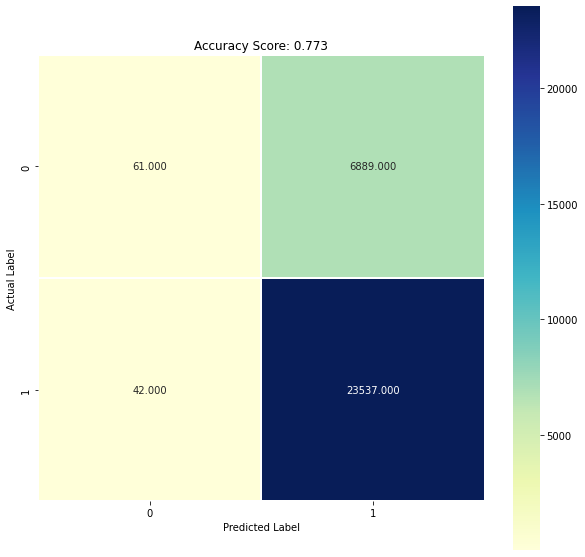

In [43]:
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(y_test1,predict1),annot=True,fmt='.3f',
        linewidth = 1,square = True,cmap = 'YlGnBu')
log_score = round(logmodel.score(X_test1,y_test1),4)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
title = 'Accuracy Score: {0}'.format(log_score)
plt.title(title,size=12)

# KNN Model

## Scaling Features

In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
# Create a scaler 
scaler = StandardScaler()

In [46]:
# Send the data to scaler and train it
scaler.fit(df2.drop('DIABETES_MEDICATION', axis=1))

StandardScaler()

In [47]:
# transform original dataframe into scaled version
scaled_features = scaler.transform(df2.drop('DIABETES_MEDICATION', axis=1))

## Split the data

In [66]:
X_train2,X_test2,y_train2,y_test2 = train_test_split(scaled_features,df2['DIABETES_MEDICATION'],test_size=0.3,random_state=50)

## Find optimal K value

In [67]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [68]:
# Create a list to store score of different k value
score = []

In [69]:
for i in range(1,40):
  #Create KNN model
  knn = KNeighborsClassifier(n_neighbors=i)
  # Train knn model
  knn.fit(X_train2,y_train2)
  # Predict X_test2
  y_pred = knn.predict(X_test2)
  score.append(metrics.accuracy_score(y_test2,y_pred))

# Visualize scores of different K value

TypeError: ignored

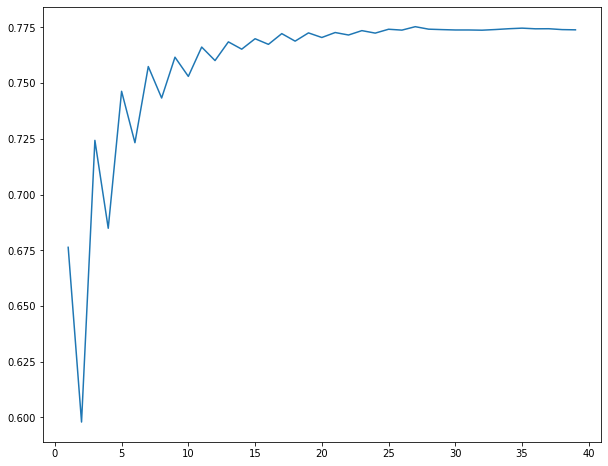

In [71]:
plt.figure(figsize=(10,8))
plt.plot(range(1,40),score)
plt.xlabel('K Value')
plt.ylabel('Score(Higher is Better')
plt.show()

In [72]:
# Figure it out the optimal K
score.index(max(score))

26

## KNN Model Performance 

In [73]:
# K = 26
knn = KNeighborsClassifier(n_neighbors=26)
knn.fit(X_train2,y_train2)
predict2 = knn.predict(X_test2)

### Classification Report

In [74]:
print(classification_report(y_test2,predict2))

              precision    recall  f1-score   support

           0       0.52      0.08      0.13      6950
           1       0.78      0.98      0.87     23579

    accuracy                           0.77     30529
   macro avg       0.65      0.53      0.50     30529
weighted avg       0.72      0.77      0.70     30529



### Confusion Matrix

In [75]:
print(confusion_matrix(y_test2,predict2))

[[  533  6417]
 [  489 23090]]


#### Visualize confusion Matrix

Text(0.5, 1.0, 'Accuracy Score: 0.774')

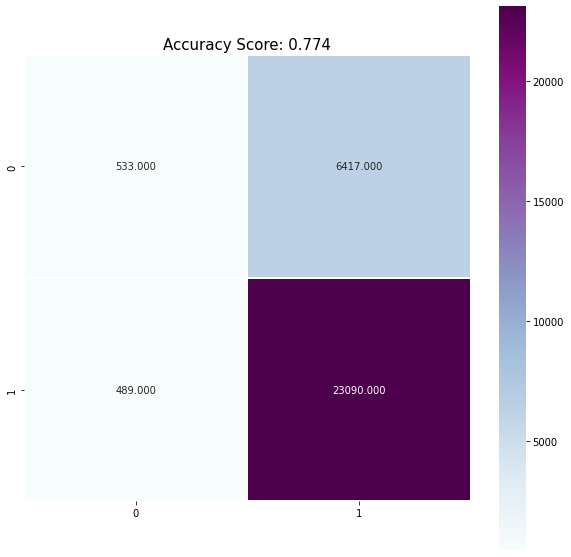

In [76]:
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(y_test2,predict2),annot=True,fmt='.3f',linewidths=1,
            square=True,cmap='BuPu')
knn_score = round(knn.score(X_test2,y_test2),3)
plt.ylabel=('Actual label')
plt.xlabel=('Predicted label')
all_sample_title = f'Accuracy Score: {knn_score}'
plt.title(all_sample_title, size = 15)

In [ ]:
X_train2,X_test2,y_train2,y_test2 = train_test_split(scaled_features,df2['DIABETES_MEDICATION'],test_size=0.3,random_state=50)

In [82]:
error_rate = []
for i in range (1,40):

  knn = KNeighborsClassifier(n_neighbors = i)
  knn.fit(X_train2, y_train2)
  pred_i = knn.predict(X_test2)
  error_rate.append(np.mean(pred_i != y_test2))

TypeError: ignored

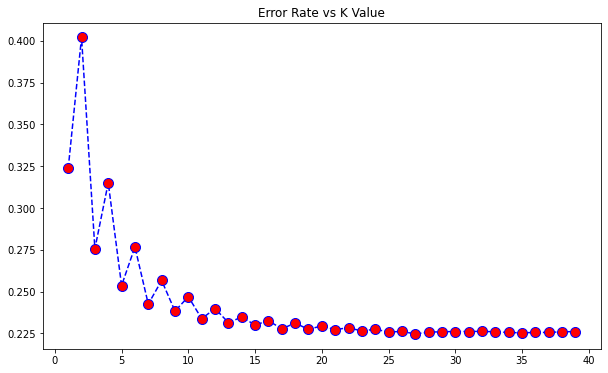

In [83]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color = 'blue', linestyle='dashed', 
         marker = 'o', markerfacecolor = 'red', markersize =10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

# Model Selection

Based on the similar accuracy scores that both the Logisitic Regression model and the KNN model yield,we determined that when using the dataframe that we used,one could choose to use either of the 2 classification models given the similarity in performance.